In [1]:
import sys
import functions as fnc
import json
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

In [6]:
test=np.array([[0,1,0,2,3],[0,1,0,2,3],[0,1,0,2,3],[0,1,0,2,3],[0,1,0,2,3]])
test_mask=np.array([[0,0,0,0,0],[0,0,1,0,0],[0,1,1,1,0],[0,0,1,0,0],[0,0,0,0,0]])
test[(test_mask>0).astype('bool')]

array([0, 1, 0, 2, 0])

In [29]:
init_para={'OutDIR': '/DATA/vito/output/Ravi3_run2_dw4_nostb/',
      'DataDIR': '/DATA/vito/data/',
      #'DatasetName': 'sand/*',
      'DatasetName': 'Ravi/*',
      #'DatasetName': 'example/*',
      'fid': 3,
      'crop_size': 1024,
      'resample_factor': 1/4,
      'point_per_side': 30,
      'dilation_size':15,
      'min_size_factor':0.0001,
      #'window_step':0.5,
      'b':200,
      'stability_t':0,
      'third_b_resample_factor':None #None: use method A. 1: auto select resample rate.
      }
DataDIR=init_para.get('DataDIR')
DSname=init_para.get('DatasetName')
fid=init_para.get('fid')
pre_para={'Downsample': {'fxy':1/4}}
b=init_para.get('b')
crop_size=init_para.get('crop_size')
image=fnc.load_image(DataDIR,DSname,fid)
print('Image size:', image.shape)
image=fnc.preprocessing_roulette(image, pre_para)

patches = fnc.get_image_patches(image, crop_size, 2*b)

Ravi3_orthomosaic_clip_02mm.tif imported
Image size: (28382, 32563, 3)


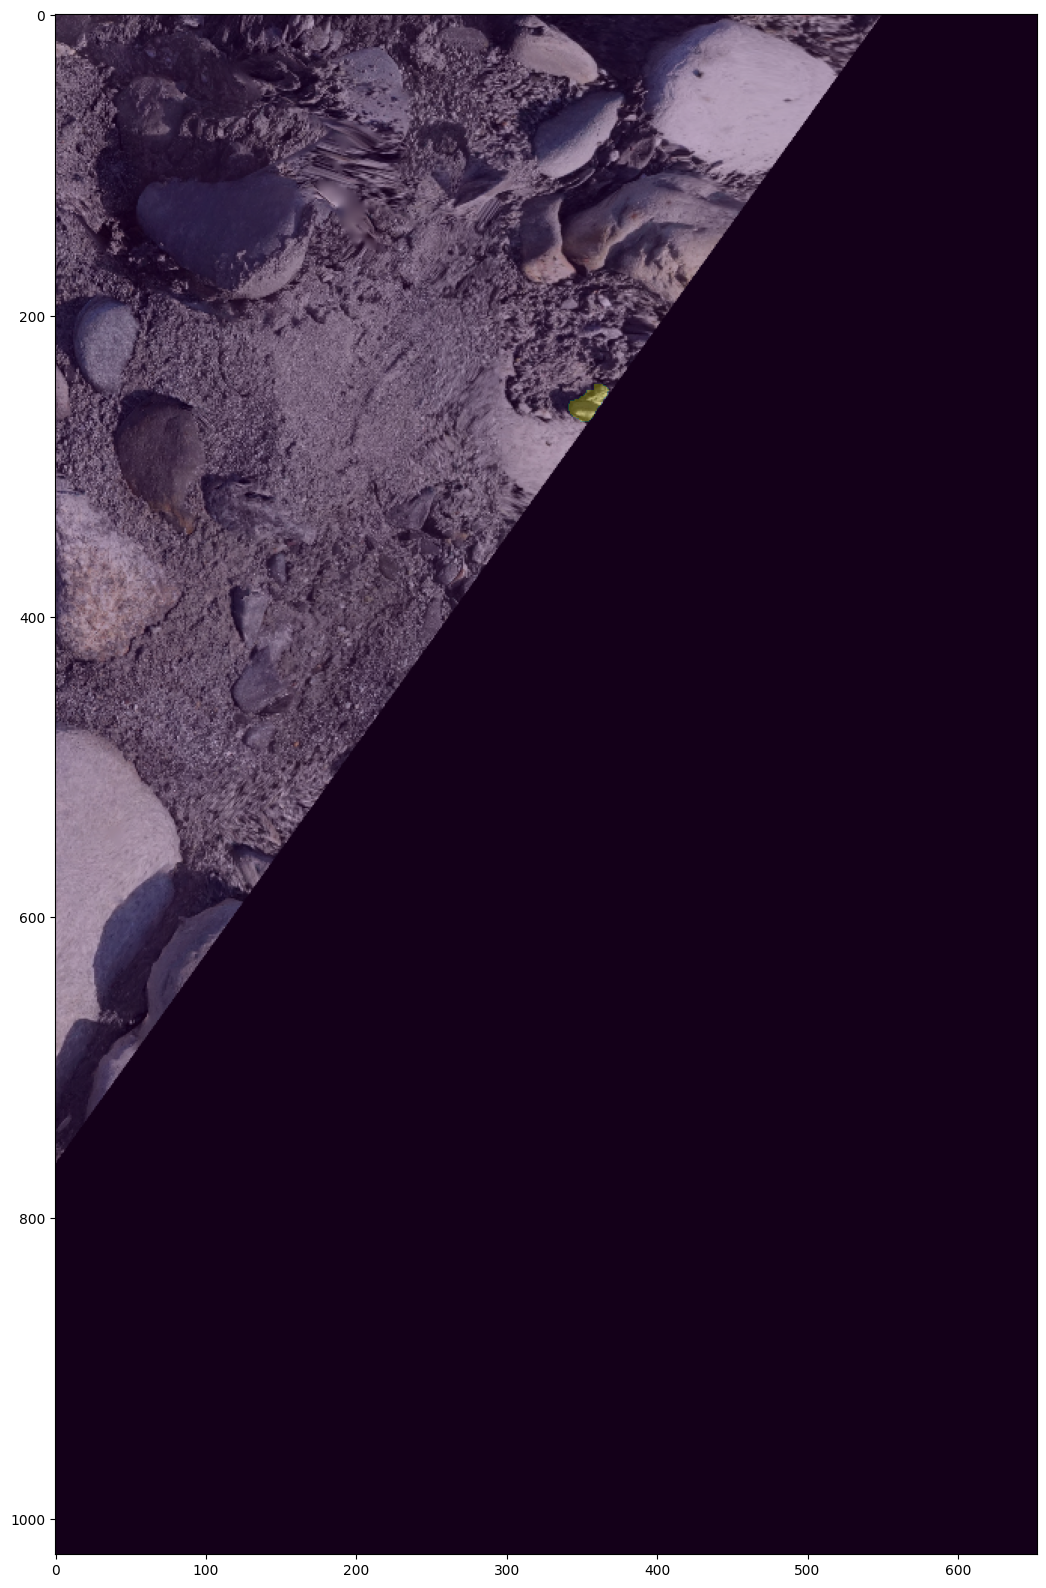

In [40]:
plt.figure(figsize=(20,20))
plt.imshow(patches[(6,12)])
plt.imshow(test[0]['nms mask'][2],alpha=0.3)

In [33]:
patches[(7,12)].shape

(1024, 653, 3)

In [16]:
test=np.load('/DATA/vito/output/Ravi3_run2_dw4_nostb/chunks/chunk_7_0.npy', allow_pickle=True)

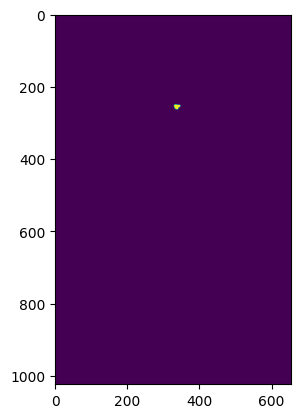

In [28]:
plt.imshow(test[0]['nms mask'][3])

In [3]:
OutDIR='/DATA/vito/output/Ravi3_run2_dw8_stb085/'

with open(OutDIR+'init_para.json', 'r') as json_file:
    init_para = json.load(json_file)

DataDIR=init_para.get('DataDIR')
DSname=init_para.get('DatasetName')
fid=init_para.get('fid')
resample_factor=init_para.get('resample_factor')

image=fnc.load_image(DataDIR,DSname,fid)
org_shape=image.shape
print('Image size:', image.shape)

with open(OutDIR+'pre_para.json', 'r') as json_file:
    pre_para = json.load(json_file)

ar_masks=np.array(np.load(OutDIR+'Merged/all_mask_merged_windows_id.npy', allow_pickle=True))
#ar_masks=np.array(np.load(OutDIR+'Third/all_mask_thid_pass_id.npy', allow_pickle=True))

print('masks size:', ar_masks.shape)
print(len(np.unique(ar_masks)),' mask(s) loaded')

Ravi3_orthomosaic_clip_02mm.tif imported
Image size: (28382, 32563, 3)
masks size: (3548, 4070)
2129  mask(s) loaded


In [4]:
centroids=[fnc.get_centroid(ar_masks==id) for id in np.unique(ar_masks)]

In [5]:
len(centroids)

2129

In [6]:
centroids=np.array(centroids)/resample_factor

In [8]:
unique_labels = np.unique(ar_masks)

shuffled_labels = np.random.permutation(unique_labels)

label_mapping = dict(zip(unique_labels, shuffled_labels))

shuffled_mask = ar_masks.copy()
for old_label, new_label in label_mapping.items():
    shuffled_mask[ar_masks == old_label] = new_label

np.save(OutDIR+'Third/all_mask_thid_pass_random_id',shuffled_mask)

In [ ]:

if (resample_factor!=1 and ar_masks.shape!=org_shape[:2]):
    ar_masks=fnc.resample_fnc(ar_masks,{'target_size':org_shape[:-1][::-1], 'method':'nearest'})
    print('Resized')
np.save(OutDIR+'Third/all_mask_thid_pass_id_OrgRes',ar_masks)

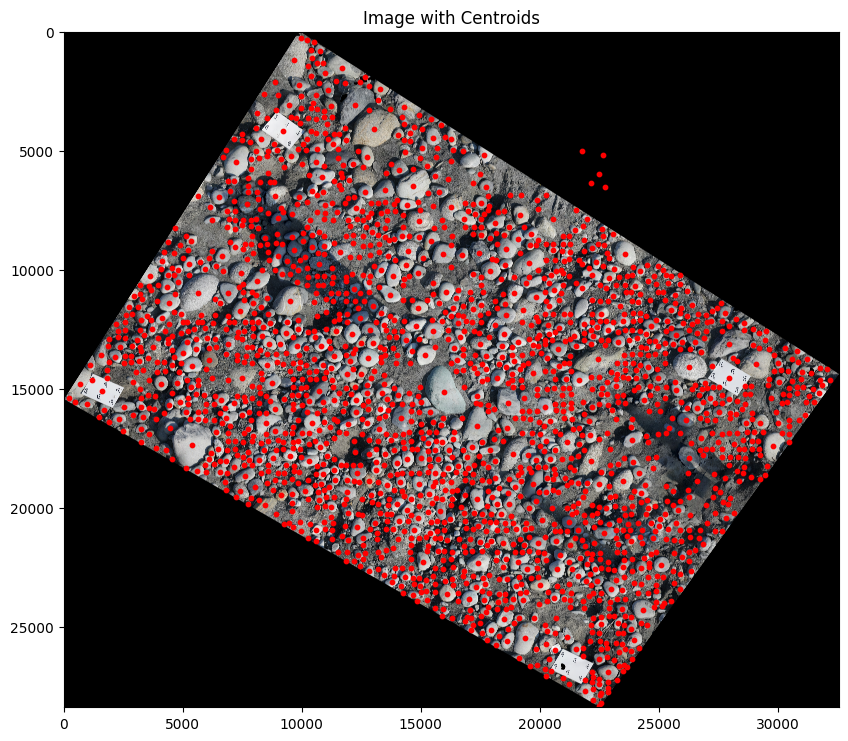

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image)

plt.scatter(centroids[:, 1], centroids[:, 0], color='red', s=10, label='Centroids')

plt.title('Image with Centroids')
plt.show()

In [10]:
np.save(OutDIR+'centroids.npy', centroids)

In [12]:
import csv
centroids_with_index = [[i, coord[0], coord[1]] for i, coord in enumerate(centroids)]

# Save as CSV
with open(OutDIR+'centroids.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['index', 'axis-0', 'axis-1'])  # Optional header
    writer.writerows(centroids_with_index)

In [3]:
labeled_image = measure.label(ar_masks)

regions = measure.regionprops(labeled_image)

centroids = np.array([region.centroid for region in regions])

In [4]:
len(centroids)

114

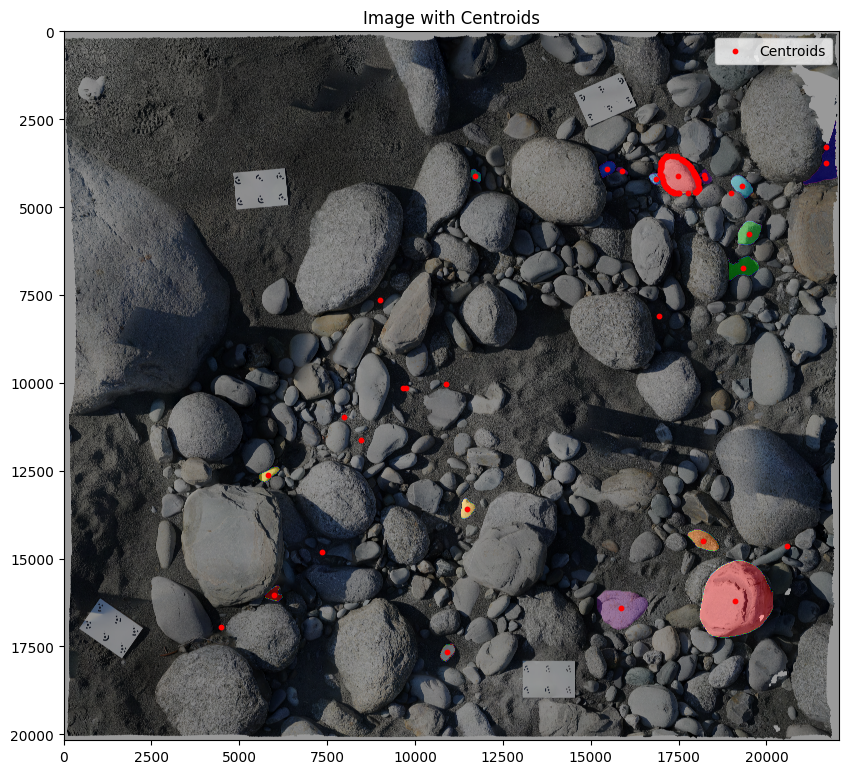

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.imshow(ar_masks, cmap='nipy_spectral',alpha=0.4)

plt.scatter(centroids[:, 1], centroids[:, 0], color='red', s=10, label='Centroids')

plt.title('Image with Centroids')
plt.legend()

In [11]:
np.save(OutDIR+'centroids.npy', centroids)

In [38]:
centroids =[]
for id in np.unique(ar_masks):
    if id!=135:
        labeled_image = measure.label(ar_masks!=135)

        # Measure properties of labeled image regions
        regions = measure.regionprops(labeled_image)

        # Find the centroid of each region
        centroids+[region.centroid for region in regions]
centroids = np.array(centroids)


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)

plt.scatter(centroids[:, 1], centroids[:, 0], color='red', s=10, label='Centroids')

plt.title('Image with Centroids')
plt.show()